In [1]:
from Functions import Estimation_dsbm
from Functions.functions import *
from Functions.functions_nodes import *

import warnings
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from sklearn.metrics.cluster import normalized_mutual_info_score

import numpy as np
import networkx as nx

from scipy.sparse.linalg import svds

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Directed

# (0) Loading the saved results

In [ ]:
import numpy as np
import os

save_dir = "results"
N_list = list(range(500, 3001, 500))
metrics = ['NMI', 'std', 'time']
methods = ['sc', 'ase', 'dase']
blocks = ['k2']
directionalities = ['dir_gmm', 'dir_kmeans', 'undir_gmm', 'undir_kmeans']

loaded_data = {}

for block in blocks:
    for metric in metrics:
        for method in methods:
            for directionality in directionalities:
                var_name = f"{metric}_{method}_{block}_{directionality}"
                file_path = os.path.join(save_dir, f"{var_name}.npy")

                if os.path.exists(file_path):
                    loaded_data[var_name] = np.load(file_path)
                else:
                    print(f"[MISSING] {file_path}")

# 1. Directed

## (1) K-Means

In [3]:
N_list = list(range(500, 3001, 500))
sparsity = [0.05]
iteration = 50  # Number of iterations per sparsity level
size_ratio = [0.5, 0.5]  # Example relative sizes of clusters

P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])


k = 2
d = 2

method = 'K-Means'


# Call the function
results = process_nodes_iterations_SBM(N_list, sparsity, iteration, size_ratio, P_matrix, d, k, True, method)

# Unpack results
( 
    dense_k2_dir_kmeans,
    
    NMI_sc_k2_dir_kmeans, NMI_ase_k2_dir_kmeans, NMI_ase2_k2_dir_kmeans, NMI_dase_k2_dir_kmeans,
    std_sc_k2_dir_kmeans, std_ase_k2_dir_kmeans, std_ase2_k2_dir_kmeans, std_dase_k2_dir_kmeans,
    time_sc_k2_dir_kmeans, time_ase_k2_dir_kmeans, time_ase2_k2_dir_kmeans, time_dase_k2_dir_kmeans
) = results

Processing:   0%|          | 0/300 [00:00<?, ?it/s]

Processing completed.


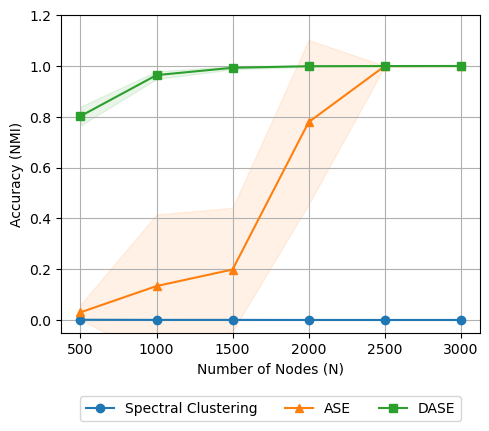

In [4]:
# plt.figure(figsize=(8, 5))
plt.figure(figsize=(5, 4.5))

plt.plot(N_list, NMI_sc_k2_dir_kmeans, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(N_list, np.array(NMI_sc_k2_dir_kmeans) - np.array(std_sc_k2_dir_kmeans),
                    np.array(NMI_sc_k2_dir_kmeans) + np.array(std_sc_k2_dir_kmeans), color='#1f77b4', alpha=0.1)

plt.plot(N_list, NMI_ase_k2_dir_kmeans, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(N_list, np.array(NMI_ase_k2_dir_kmeans) - np.array(std_ase_k2_dir_kmeans),
                    np.array(NMI_ase_k2_dir_kmeans) + np.array(std_ase_k2_dir_kmeans), color='#ff7f0e', alpha=0.1)

plt.plot(N_list, NMI_dase_k2_dir_kmeans, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(N_list, np.array(NMI_dase_k2_dir_kmeans) - np.array(std_dase_k2_dir_kmeans),
                    np.array(NMI_dase_k2_dir_kmeans) + np.array(std_dase_k2_dir_kmeans), color='#2ca02c', alpha=0.1)


plt.xlabel('Number of Nodes (N)')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.05, 1.2)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

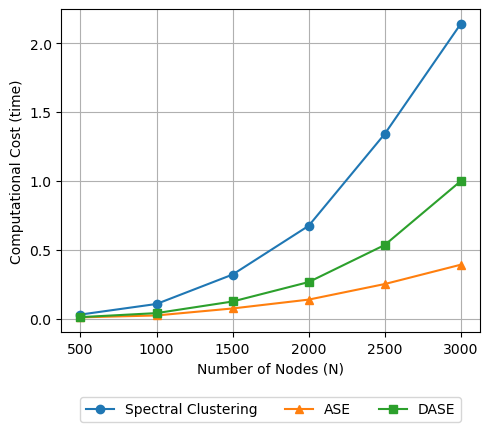

In [5]:
plt.figure(figsize=(5, 4.5))

plt.plot(N_list, time_sc_k2_dir_kmeans, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')

plt.plot(N_list, time_ase_k2_dir_kmeans, label="ASE", marker='^', linestyle='-', color='#ff7f0e')

plt.plot(N_list, time_dase_k2_dir_kmeans, label="DASE", marker='s', linestyle='-', color='#2ca02c')

plt.xlabel('Number of Nodes (N)')
plt.ylabel('Computational Cost (time)')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

## (2) GMM

In [6]:
N_list = list(range(500, 3001, 500))
sparsity = [0.05]
iteration = 50  # Number of iterations per sparsity level
size_ratio = [0.5, 0.5]  # Example relative sizes of clusters

P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])


k = 2
d = 2

method = 'GMM'


# Call the function
results = process_nodes_iterations_SBM(N_list, sparsity, iteration, size_ratio, P_matrix, d, k, True, method)

# Unpack results
( 
    dense_k2_dir_gmm,
    
    NMI_sc_k2_dir_gmm, NMI_ase_k2_dir_gmm, NMI_ase2_k2_dir_gmm, NMI_dase_k2_dir_gmm,
    std_sc_k2_dir_gmm, std_ase_k2_dir_gmm, std_ase2_k2_dir_gmm, std_dase_k2_dir_gmm,
    time_sc_k2_dir_gmm, time_ase_k2_dir_gmm, time_ase2_k2_dir_gmm, time_dase_k2_dir_gmm
) = results

Processing:   0%|          | 0/300 [00:00<?, ?it/s]

Processing completed.


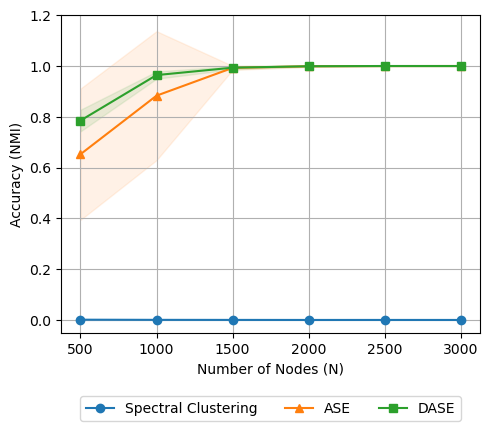

In [7]:
# plt.figure(figsize=(8, 5))
plt.figure(figsize=(5, 4.5))

plt.plot(N_list, NMI_sc_k2_dir_gmm, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(N_list, np.array(NMI_sc_k2_dir_gmm) - np.array(std_sc_k2_dir_gmm),
                    np.array(NMI_sc_k2_dir_gmm) + np.array(std_sc_k2_dir_gmm), color='#1f77b4', alpha=0.1)

plt.plot(N_list, NMI_ase_k2_dir_gmm, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(N_list, np.array(NMI_ase_k2_dir_gmm) - np.array(std_ase_k2_dir_gmm),
                    np.array(NMI_ase_k2_dir_gmm) + np.array(std_ase_k2_dir_gmm), color='#ff7f0e', alpha=0.1)

plt.plot(N_list, NMI_dase_k2_dir_gmm, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(N_list, np.array(NMI_dase_k2_dir_gmm) - np.array(std_dase_k2_dir_gmm),
                    np.array(NMI_dase_k2_dir_gmm) + np.array(std_dase_k2_dir_gmm), color='#2ca02c', alpha=0.1)


plt.xlabel('Number of Nodes (N)')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.05, 1.2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

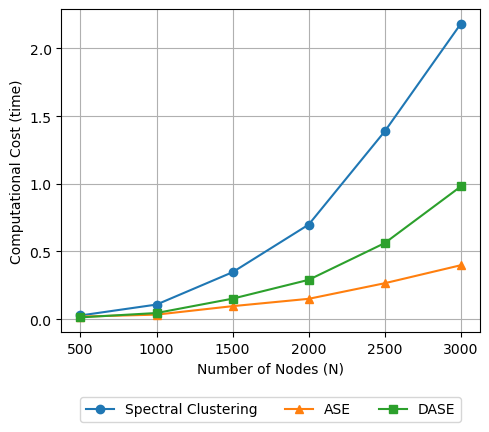

In [8]:
plt.figure(figsize=(5, 4.5))

plt.plot(N_list, time_sc_k2_dir_gmm, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')

plt.plot(N_list, time_ase_k2_dir_gmm, label="ASE", marker='^', linestyle='-', color='#ff7f0e')

plt.plot(N_list, time_dase_k2_dir_gmm, label="DASE", marker='s', linestyle='-', color='#2ca02c')

plt.xlabel('Number of Nodes (N)')
plt.ylabel('Computational Cost (time)')
# plt.ylim(-0.05, 1.2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

## Saving

In [9]:
# save
import numpy as np
import os

# === Settings ===
N_list = list(range(500, 3001, 500))
metrics = ['NMI', 'std', 'time']
methods = ['sc', 'ase', 'dase',]
blocks = ['k2']
directionalities = ['dir_gmm', 'dir_kmeans']

metric_availability = {
    'NMI': methods,
    'std': methods,
    'time': methods
}

save_dir = "results"
os.makedirs(save_dir, exist_ok=True)

# === Save main metrics ===
for block in blocks:
    for metric in metrics:
        for method in metric_availability[metric]:
            for directionality in directionalities:
                var_name = f"{metric}_{method}_{block}_{directionality}"
                data = globals().get(var_name)

                if data is None:
                    print(f"[WARN] {var_name} not found.")
                    continue

                try:
                    np.save(f"{save_dir}/{var_name}.npy", data)
#                     print(f"[OK] Saved {var_name}.npy")
                except Exception as e:
                    print(f"[ERROR] {var_name}: {e}")

# === Save dense data ===
for block in blocks:
    for directionality in directionalities:
        dense_var = f"dense_{block}_{directionality}"
        data = globals().get(dense_var)

        if data is None:
            print(f"[WARN] {dense_var} not found.")
            continue

        try:
            np.save(f"{save_dir}/{dense_var}.npy", data)
#             print(f"[OK] Saved {dense_var}.npy")
        except Exception as e:
            print(f"[ERROR] {dense_var}: {e}")

# 2. Undirected

## (1) K-Means

In [10]:
N_list = list(range(500, 3001, 500))
sparsity = [0.05]
iteration = 50  # Number of iterations per sparsity level
size_ratio = [0.5, 0.5]  # Example relative sizes of clusters

P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])


k = 2
d = 2

method = 'K-Means'


# Call the function
results = process_nodes_iterations_SBM(N_list, sparsity, iteration, size_ratio, P_matrix, d, k, False, method)

# Unpack results
( 
    dense_k2_undir_kmeans,
    
    NMI_sc_k2_undir_kmeans, NMI_ase_k2_undir_kmeans, NMI_ase2_k2_undir_kmeans, NMI_dase_k2_undir_kmeans,
    std_sc_k2_undir_kmeans, std_ase_k2_undir_kmeans, std_ase2_k2_undir_kmeans, std_dase_k2_undir_kmeans,
    time_sc_k2_undir_kmeans, time_ase_k2_undir_kmeans, time_ase2_k2_undir_kmeans, time_dase_k2_undir_kmeans
) = results

Processing:   0%|          | 0/300 [00:00<?, ?it/s]

Processing completed.


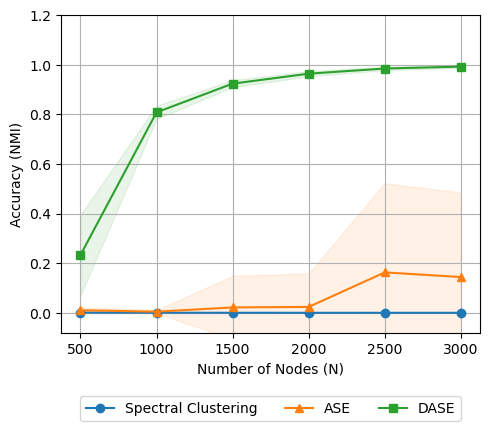

In [11]:
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(5, 4.5))

plt.plot(N_list, NMI_sc_k2_undir_kmeans, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(N_list, np.array(NMI_sc_k2_undir_kmeans) - np.array(std_sc_k2_undir_kmeans),
                    np.array(NMI_sc_k2_undir_kmeans) + np.array(std_sc_k2_undir_kmeans), color='#1f77b4', alpha=0.1)

plt.plot(N_list, NMI_ase_k2_undir_kmeans, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(N_list, np.array(NMI_ase_k2_undir_kmeans) - np.array(std_ase_k2_undir_kmeans),
                    np.array(NMI_ase_k2_undir_kmeans) + np.array(std_ase_k2_undir_kmeans), color='#ff7f0e', alpha=0.1)

plt.plot(N_list, NMI_dase_k2_undir_kmeans, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(N_list, np.array(NMI_dase_k2_undir_kmeans) - np.array(std_dase_k2_undir_kmeans),
                    np.array(NMI_dase_k2_undir_kmeans) + np.array(std_dase_k2_undir_kmeans), color='#2ca02c', alpha=0.1)

plt.xlabel('Number of Nodes (N)')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.08, 1.2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

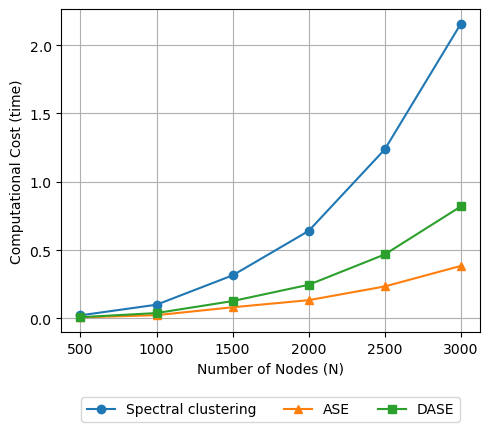

In [12]:
# plt.figure(figsize=(8, 5))
plt.figure(figsize=(5, 4.5))

plt.plot(N_list, time_sc_k2_undir_kmeans, label="Spectral clustering", marker='o', linestyle='-', color='#1f77b4')

plt.plot(N_list, time_ase_k2_undir_kmeans, label="ASE", marker='^', linestyle='-', color='#ff7f0e')

plt.plot(N_list, time_dase_k2_undir_kmeans, label="DASE", marker='s', linestyle='-', color='#2ca02c')

plt.xlabel('Number of Nodes (N)')
plt.ylabel('Computational Cost (time)')
# plt.ylim(-0.05, 1.2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

## (2) GMM

In [13]:
N_list = list(range(500, 3001, 500))
sparsity = [0.05]
iteration = 50  # Number of iterations per sparsity level
size_ratio = [0.5, 0.5]  # Example relative sizes of clusters

P_matrix = np.array([
    [1, 0.6],
    [0.6, 0.3]
])


k = 2
d = 2

method = 'GMM'


# Call the function
results = process_nodes_iterations_SBM(N_list, sparsity, iteration, size_ratio, P_matrix, d, k, False, method)

# Unpack results
( 
    dense_k2_undir_gmm,
    
    NMI_sc_k2_undir_gmm, NMI_ase_k2_undir_gmm, NMI_ase2_k2_undir_gmm, NMI_dase_k2_undir_gmm,
    std_sc_k2_undir_gmm, std_ase_k2_undir_gmm, std_ase2_k2_undir_gmm, std_dase_k2_undir_gmm,
    time_sc_k2_undir_gmm, time_ase_k2_undir_gmm, time_ase2_k2_undir_gmm, time_dase_k2_undir_gmm
) = results

Processing:   0%|          | 0/300 [00:00<?, ?it/s]

Processing completed.


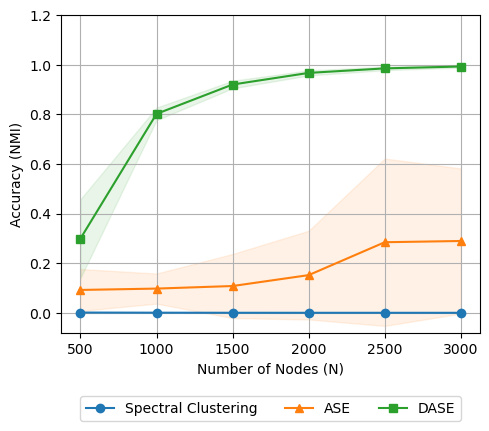

In [14]:
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(5, 4.5))

plt.plot(N_list, NMI_sc_k2_undir_gmm, label="Spectral Clustering", marker='o', linestyle='-', color='#1f77b4')
plt.fill_between(N_list, np.array(NMI_sc_k2_undir_gmm) - np.array(std_sc_k2_undir_gmm),
                    np.array(NMI_sc_k2_undir_gmm) + np.array(std_sc_k2_undir_gmm), color='#1f77b4', alpha=0.1)

plt.plot(N_list, NMI_ase_k2_undir_gmm, label="ASE", marker='^', linestyle='-', color='#ff7f0e')
plt.fill_between(N_list, np.array(NMI_ase_k2_undir_gmm) - np.array(std_ase_k2_undir_gmm),
                    np.array(NMI_ase_k2_undir_gmm) + np.array(std_ase_k2_undir_gmm), color='#ff7f0e', alpha=0.1)

plt.plot(N_list, NMI_dase_k2_undir_gmm, label="DASE", marker='s', linestyle='-', color='#2ca02c')
plt.fill_between(N_list, np.array(NMI_dase_k2_undir_gmm) - np.array(std_dase_k2_undir_gmm),
                    np.array(NMI_dase_k2_undir_gmm) + np.array(std_dase_k2_undir_gmm), color='#2ca02c', alpha=0.1)

plt.xlabel('Number of Nodes (N)')
plt.ylabel('Accuracy (NMI)')
plt.ylim(-0.08, 1.2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()


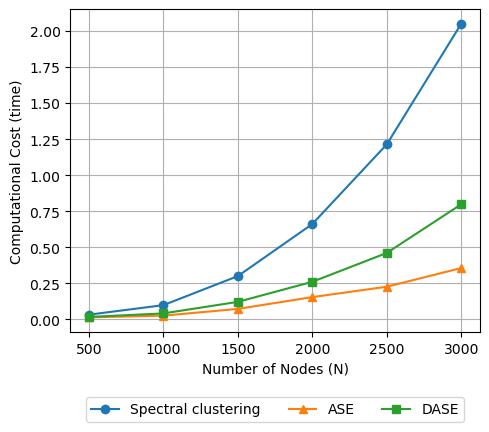

In [15]:
# plt.figure(figsize=(8, 5))
plt.figure(figsize=(5, 4.5))

plt.plot(N_list, time_sc_k2_undir_gmm, label="Spectral clustering", marker='o', linestyle='-', color='#1f77b4')

plt.plot(N_list, time_ase_k2_undir_gmm, label="ASE", marker='^', linestyle='-', color='#ff7f0e')

plt.plot(N_list, time_dase_k2_undir_gmm, label="DASE", marker='s', linestyle='-', color='#2ca02c')

plt.xlabel('Number of Nodes (N)')
plt.ylabel('Computational Cost (time)')
# plt.ylim(-0.05, 1.2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid()
plt.tight_layout()
plt.show()

## Saving

In [16]:
# save
import numpy as np
import os

# === Settings ===
N_list = list(range(500, 3001, 500))
metrics = ['NMI', 'std', 'time']
methods = ['sc', 'ase', 'dase']
blocks = ['k2']
directionalities = ['dir_gmm', 'dir_kmeans']


metric_availability = {
    'NMI': methods,
    'std': methods,
    'time': methods
}

save_dir = "results"
os.makedirs(save_dir, exist_ok=True)

# === Save main metrics ===
for block in blocks:
    for metric in metrics:
        for method in metric_availability[metric]:
            for directionality in directionalities:
                var_name = f"{metric}_{method}_{block}_{directionality}"
                data = globals().get(var_name)

                if data is None:
                    print(f"[WARN] {var_name} not found.")
                    continue

                try:
                    np.save(f"{save_dir}/{var_name}.npy", data)
#                     print(f"[OK] Saved {var_name}.npy")
                except Exception as e:
                    print(f"[ERROR] {var_name}: {e}")

# === Save dense data ===
for block in blocks:
    for directionality in directionalities:
        dense_var = f"dense_{block}_{directionality}"
        data = globals().get(dense_var)

        if data is None:
            print(f"[WARN] {dense_var} not found.")
            continue

        try:
            np.save(f"{save_dir}/{dense_var}.npy", data)
#             print(f"[OK] Saved {dense_var}.npy")
        except Exception as e:
            print(f"[ERROR] {dense_var}: {e}")